In [1]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as pl

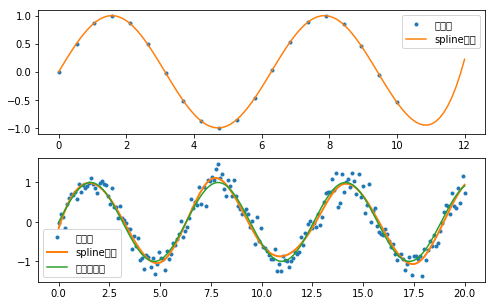

In [9]:
x1 = np.linspace(0, 10, 20)
y1 = np.sin(x1)
sx1 = np.linspace(0, 12, 100)
sy1 = interpolate.UnivariateSpline(x1, y1, s=0)(sx1)
x2 = np.linspace(0, 20, 200)
y2 = np.sin(x2) + np.random.standard_normal(len(x2)) * 0.2
sx2 = np.linspace(0, 20, 2000)
spline2 = interpolate.UnivariateSpline(x2, y2, s=8)
sy2 = spline2(sx2)

pl.figure(figsize=(8, 5))
pl.subplot(211)
pl.plot(x1, y1, ".", label=u"数据点")
pl.plot(sx1, sy1, label=u"spline曲线")
pl.legend()

pl.subplot(212)
pl.plot(x2, y2, ".", label=u"数据点")
pl.plot(sx2, sy2, linewidth=2, label=u"spline曲线")
pl.plot(x2, np.sin(x2), label=u"无噪声曲线")
pl.legend()
pl.show()

In [4]:
print np.array_str(spline2.roots(), precision=3)

[  0.138   3.128   6.239   9.231  12.555  15.796  18.83 ]


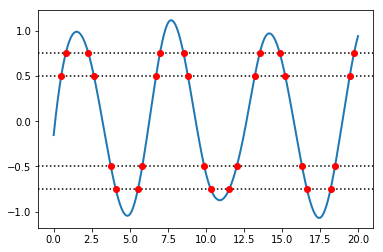

In [10]:
def roots_at(self, v):
    coeff = self.get_coeffs()
    coeff -= v
    try:
        root = self.roots()
        return root
    finally:
        coeff += v

interpolate.UnivariateSpline.roots_at = roots_at

pl.plot(sx2, sy2, linewidth=2, label=u"spline曲线")

ax = pl.gca()
for level in [0.5, 0.75, -0.5, -0.75]:
    ax.axhline(level, ls=":", color="k")
    xr = spline2.roots_at(level)
    pl.plot(xr, spline2(xr), "ro")
    
pl.show()

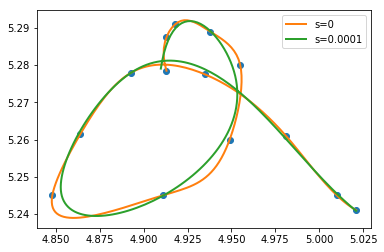

In [11]:
x = [4.913, 4.913, 4.918, 4.938, 4.955, 4.949, 4.911, 4.848, 4.864, 4.893, 4.935, 4.981, 5.01, 5.021]
y = [5.2785, 5.2875, 5.291, 5.289, 5.28, 5.26, 5.245, 5.245, 5.2615, 5.278, 5.2775, 5.261, 5.245, 5.241]

pl.plot(x, y, "o")

for s in (0, 1e-4):
    tck, t = interpolate.splprep([x, y], s=s)
    xi, yi = interpolate.splev(np.linspace(t[0], t[-1], 200), tck)
    pl.plot(xi, yi, lw=2, label=u"s=%g" % s)
    
pl.legend()
pl.show()